# Exercise 14-1: More analysis of the Social Survey data - Solution

## Get the data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# read codebook pages 2715 & 2768

In [3]:
socialMedia = pd.read_stata('../../../data/GSS7218_R3.DTA', 
                            columns=['id','snsmyear','intwkdyh','intwkdym','intwkenh','intwkenm'])

In [4]:
mentalHealth = pd.read_stata('../../../data/GSS7218_R3.DTA', 
                             columns=['id','cesd1','cesd2','cesd3','cesd4','cesd5'])

In [5]:
socialMedia = socialMedia.dropna()
socialMedia = socialMedia.set_index('id')

In [6]:
mentalHealth = mentalHealth.dropna()
mentalHealth = mentalHealth.set_index('id')

In [7]:
socialHealth = socialMedia.join(mentalHealth, how='inner').dropna()

In [8]:
socialHealth.head()

,snsmyear,intwkdyh,intwkdym,intwkenh,intwkenm,cesd1,cesd2,cesd3,cesd4,cesd5
id,,,,,,,,,,
5,2016.0,1.0,0.0,1.0,0.0,none or almost none of the time,some of the time,most of the time,none or almost none of the time,some of the time
8,2010.0,2.0,0.0,3.0,0.0,none or almost none of the time,some of the time,all or almost all of the time,none or almost none of the time,some of the time
10,2011.0,6.0,0.0,5.0,0.0,none or almost none of the time,some of the time,most of the time,none or almost none of the time,none or almost none of the time
22,2009.0,1.0,0.0,2.0,0.0,none or almost none of the time,none or almost none of the time,most of the time,none or almost none of the time,none or almost none of the time
25,2007.0,10.0,0.0,8.0,0.0,none or almost none of the time,some of the time,most of the time,some of the time,some of the time


In [9]:
socialHealth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544 entries, 5 to 2867
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   snsmyear  544 non-null    category
 1   intwkdyh  544 non-null    category
 2   intwkdym  544 non-null    category
 3   intwkenh  544 non-null    category
 4   intwkenm  544 non-null    category
 5   cesd1     544 non-null    category
 6   cesd2     544 non-null    category
 7   cesd3     544 non-null    category
 8   cesd4     544 non-null    category
 9   cesd5     544 non-null    category
dtypes: category(10)
memory usage: 11.3 KB


## Clean and prepare the data

In [10]:
socialHealth = socialHealth.rename(columns={'snsmyear':'yearAquired', 
                             'intwkdyh':'weekdayHours', 
                             'intwkdym':'weekdayMinutes', 
                             'intwkenh':'weekendHours', 
                             'intwkenm':'weekendMinutes', 
                             'cesd1':'depressed', 
                             'cesd2':'restlessSleep', 
                             'cesd3':'happy', 
                             'cesd4':'lonely', 
                             'cesd5':'sad'})
                    

In [11]:
socialHealth.weekdayMinutes.value_counts()

weekdayMinutes
0.0     451
30.0     67
15.0      8
20.0      8
45.0      5
10.0      3
2.0       1
59.0      1
1.0       0
3.0       0
5.0       0
25.0      0
40.0      0
55.0      0
Name: count, dtype: int64

In [12]:
socialHealth.weekendMinutes.value_counts()

weekendMinutes
0.0     448
30.0     61
10.0      7
15.0      7
45.0      7
20.0      6
3.0       2
5.0       2
40.0      2
1.0       1
59.0      1
25.0      0
35.0      0
50.0      0
Name: count, dtype: int64

In [13]:
socialHealth = socialHealth.query(
    'weekdayMinutes in [0,15,30,45] and weekendMinutes in [0,15,30,45]').copy()

In [14]:
socialHealth.yearAquired = socialHealth.yearAquired.astype(int)
socialHealth.weekdayHours = socialHealth.weekdayHours.astype(int)
socialHealth.weekdayMinutes = socialHealth.weekdayMinutes.astype(int)
socialHealth.weekendHours = socialHealth.weekendHours.astype(int)
socialHealth.weekendMinutes = socialHealth.weekendMinutes.astype(int)

In [15]:
socialHealth.weekdayHours = socialHealth.weekdayHours + (socialHealth.weekdayMinutes / 60)
socialHealth.weekendHours = socialHealth.weekendHours + (socialHealth.weekendMinutes / 60)

In [16]:
socialHealth = socialHealth.drop(columns=['weekdayMinutes','weekendMinutes'])

In [17]:
socialHealth.head()

,yearAquired,weekdayHours,weekendHours,depressed,restlessSleep,happy,lonely,sad
id,,,,,,,,
5,2016,1.0,1.0,none or almost none of the time,some of the time,most of the time,none or almost none of the time,some of the time
8,2010,2.0,3.0,none or almost none of the time,some of the time,all or almost all of the time,none or almost none of the time,some of the time
10,2011,6.0,5.0,none or almost none of the time,some of the time,most of the time,none or almost none of the time,none or almost none of the time
22,2009,1.0,2.0,none or almost none of the time,none or almost none of the time,most of the time,none or almost none of the time,none or almost none of the time
25,2007,10.0,8.0,none or almost none of the time,some of the time,most of the time,some of the time,some of the time


## Test a hypothesis

#### Hypothesis: More weekday social media use is correlated with lower sleep quality.

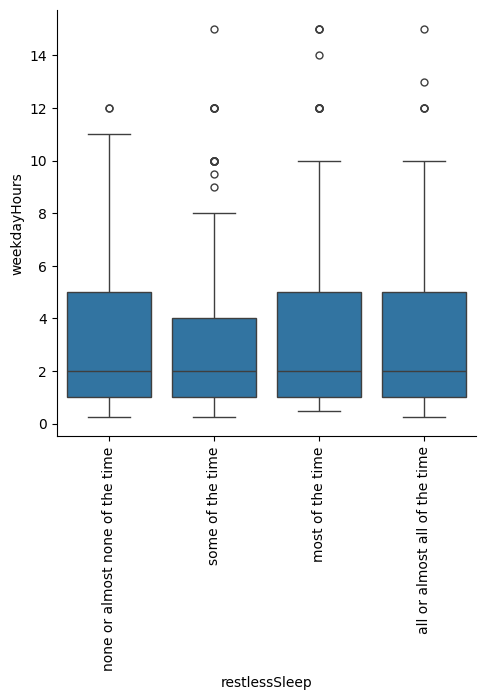

In [18]:
g = sns.catplot(data=socialHealth, x='restlessSleep', y='weekdayHours', kind='box')

for ax in g.axes.flat:
    ax.tick_params('x',labelrotation=90)

In [19]:
socialHealth['weekdayHoursBin'] = pd.cut(socialHealth.weekdayHours, 
                                           bins=[0,3,6,9,12,15], 
                                           labels=['0-3','3-6','6-9','9-12','12-15'], 
                                           right=False)

In [20]:
socialHealth[['weekdayHoursBin','restlessSleep']].value_counts(sort=False)

weekdayHoursBin  restlessSleep                  
0-3              none or almost none of the time     94
                 some of the time                   122
                 most of the time                    49
                 all or almost all of the time       24
3-6              none or almost none of the time     28
                 some of the time                    61
                 most of the time                    27
                 all or almost all of the time       11
6-9              none or almost none of the time     22
                 some of the time                    20
                 most of the time                     8
                 all or almost all of the time        4
9-12             none or almost none of the time      9
                 some of the time                    11
                 most of the time                     2
                 all or almost all of the time        1
12-15            none or almost none of the time      2

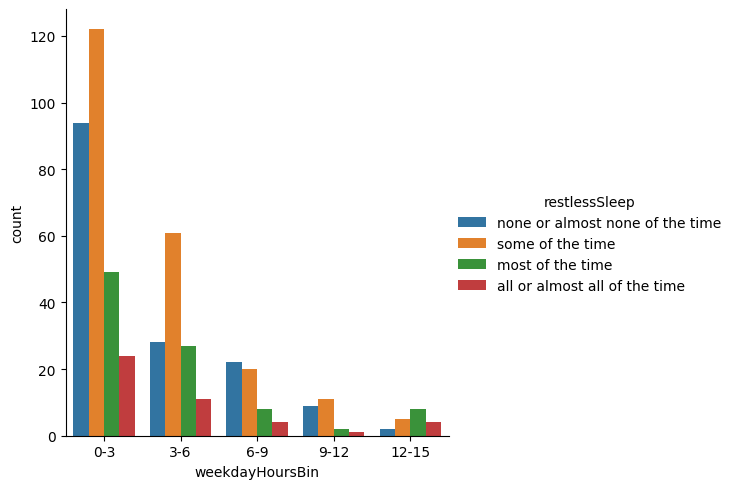

In [21]:
sns.catplot(data=socialHealth, kind='count', 
            x='weekdayHoursBin', hue='restlessSleep')

In [22]:
hoursGrouped = socialHealth.groupby('weekdayHoursBin', observed=True).restlessSleep.value_counts(
    normalize=True).to_frame()
hoursGrouped.head()

proportion
weekdayHoursBin restlessSleep                              
0-3             some of the time                   0.422145
                none or almost none of the time    0.325260
                most of the time                   0.169550
                all or almost all of the time      0.083045
3-6             some of the time                   0.480315

In [23]:
hoursGrouped.columns = ['percentage']
hoursGrouped = hoursGrouped.reset_index()
hoursGrouped.head()

,weekdayHoursBin,restlessSleep,percentage
0,0-3,some of the time,0.422145
1,0-3,none or almost none of the time,0.325260
2,0-3,most of the time,0.169550
3,0-3,all or almost all of the time,0.083045
4,3-6,some of the time,0.480315


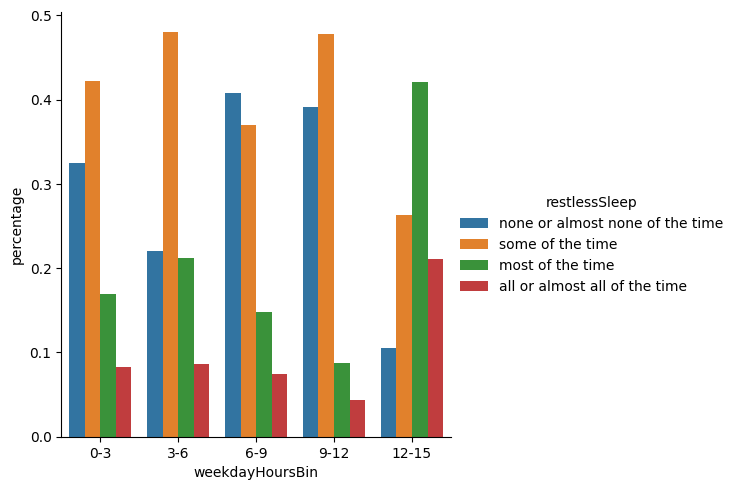

In [24]:
sns.catplot(data=hoursGrouped, kind='bar', 
            x='weekdayHoursBin', y='percentage', hue='restlessSleep')

#### Conclusion: Social media is correlated with poor sleep quality but only in the most extreme cases.